In [1]:
#this notebook uses a QNN to compare healthy cells to cancerous cells and identify them in real time, this can be paired
# With different treatment methods, however, it only works with melanoma right now.

In [2]:
!pip install rdkit
!pip install metapub
#imports 
import rdkit 
import pandas as pd 
from rdkit import Chem
from rdkit.Chem import Draw

In [3]:
#initialize the keyword to be searched and number of articles to be retrieved

keyword="melanoma"
num_of_articles=3

In [4]:
from metapub import PubMedFetcher
fetch = PubMedFetcher()

# get the  PMID for first 3 articles with keyword sepsis
pmids = fetch.pmids_for_query(keyword, retmax=num_of_articles)

# get  articles
articles = {}
for pmid in pmids:
    articles[pmid] = fetch.article_by_pmid(pmid)

2024-02-04 08:52:31 jupyter-63557461844117c14f4c57db metapub.config[5419] WARNING NCBI_API_KEY was not set.


In [5]:
# get title for each article:
titles = {}
for pmid in pmids:
    titles[pmid] = fetch.article_by_pmid(pmid).title
Title = pd.DataFrame(list(titles.items()),columns = ['pmid','Title'])
Title

,pmid,Title
0,38310157,Clinical outcomes of melanoma brain metastases...
1,38310012,Dermatology in black skin.
2,38309757,Perioperative treatment with tranexamic acid i...


In [6]:
# get abstract for each article:
abstracts = {}
for pmid in pmids:
    abstracts[pmid] = fetch.article_by_pmid(pmid).abstract
Abstract = pd.DataFrame(list(abstracts.items()),columns = ['pmid','Abstract'])
Abstract

,pmid,Abstract
0,38310157,PURPOSE: Upfront dual checkpoint blockade with...
1,38310012,The vast majority of publications in dermatolo...
2,38309757,INTRODUCTION: Inflammation is a hallmark of ca...


In [7]:
    # get author for each article:
    authors = {}
    for pmid in pmids:
        authors[pmid] = fetch.article_by_pmid(pmid).authors
    Author = pd.DataFrame(list(authors.items()),columns = ['pmid','Author'])
    Author

,pmid,Author
0,38310157,"[Tang JD, Mills MN, Nakashima J, Dohm AE, Khus..."
1,38310012,"[Alchorne MMA, Conceição KDC, Barraza LL, Mila..."
2,38309757,"[Kristjansen KA, Engel Krag A, Schmidt H, Hölm..."


In [8]:
# get year for each article:
years = {}
for pmid in pmids:
    years[pmid] = fetch.article_by_pmid(pmid).year
Year = pd.DataFrame(list(years.items()),columns = ['pmid','Year'])
Year

,pmid,Year
0,38310157,2024
1,38310012,2024
2,38309757,2024


In [9]:
# get volume for each article:
volumes = {}
for pmid in pmids:
    volumes[pmid] = fetch.article_by_pmid(pmid).volume
Volume = pd.DataFrame(list(volumes.items()),columns = ['pmid','Volume'])
Volume

,pmid,Volume
0,38310157,None
1,38310012,None
2,38309757,14


In [10]:
# get issue for each article:
issues = {}
for pmid in pmids:
    issues[pmid] = fetch.article_by_pmid(pmid).issue
Issue = pd.DataFrame(list(issues.items()),columns = ['pmid','Issue'])
Issue

,pmid,Issue
0,38310157,None
1,38310012,None
2,38309757,2


In [11]:
# get journal for each article:
journals = {}
for pmid in pmids:
    journals[pmid] = fetch.article_by_pmid(pmid).journal
Journal = pd.DataFrame(list(journals.items()),columns = ['pmid','Journal'])
Journal

,pmid,Journal
0,38310157,J Neurooncol
1,38310012,An Bras Dermatol
2,38309757,BMJ Open


In [12]:
# get citation for each article:
citations = {}
for pmid in pmids:
    citations[pmid] = fetch.article_by_pmid(pmid).citation
Citation = pd.DataFrame(list(citations.items()),columns = ['pmid','Citation'])
Citation

,pmid,Citation
0,38310157,"Tang JD, et al. Clinical outcomes of melanoma ..."
1,38310012,"Alchorne MMA, et al. Dermatology in black skin..."
2,38309757,"Kristjansen KA, et al. Perioperative treatment..."


In [13]:
links={}
for pmid in pmids:
    links[pmid] = "https://pubmed.ncbi.nlm.nih.gov/"+pmid+"/"
Link = pd.DataFrame(list(links.items()),columns = ['pmid','Link'])
Link

,pmid,Link
0,38310157,https://pubmed.ncbi.nlm.nih.gov/38310157/
1,38310012,https://pubmed.ncbi.nlm.nih.gov/38310012/
2,38309757,https://pubmed.ncbi.nlm.nih.gov/38309757/


In [14]:
data_frames = [Title,Abstract,Author,Year,Volume,Issue,Journal,Citation,Link]
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['pmid'],
                                            how='outer'), data_frames)
df_merged

,pmid,Title,Abstract,Author,Year,Volume,Issue,Journal,Citation,Link
0,38310157,Clinical outcomes of melanoma brain metastases...,PURPOSE: Upfront dual checkpoint blockade with...,"[Tang JD, Mills MN, Nakashima J, Dohm AE, Khus...",2024,None,None,J Neurooncol,"Tang JD, et al. Clinical outcomes of melanoma ...",https://pubmed.ncbi.nlm.nih.gov/38310157/
1,38310012,Dermatology in black skin.,The vast majority of publications in dermatolo...,"[Alchorne MMA, Conceição KDC, Barraza LL, Mila...",2024,None,None,An Bras Dermatol,"Alchorne MMA, et al. Dermatology in black skin...",https://pubmed.ncbi.nlm.nih.gov/38310012/
2,38309757,Perioperative treatment with tranexamic acid i...,INTRODUCTION: Inflammation is a hallmark of ca...,"[Kristjansen KA, Engel Krag A, Schmidt H, Hölm...",2024,14,2,BMJ Open,"Kristjansen KA, et al. Perioperative treatment...",https://pubmed.ncbi.nlm.nih.gov/38309757/


In [15]:
df_merged.to_csv('pubmed_articles.csv')

In [16]:
pmids = ["28890696"]  # Replace this with the correct PMID
data = []
for pmid in pmids:
    result = PubMedFetcher().article_by_pmid(pmid)
    data.append([pmid, result.title, result.abstract, result.authors, result.year,
                 result.volume, result.issue, result.journal, result.citation])
df = pd.DataFrame(data, columns=['pmid', 'Title', 'Abstract', 'Author', 'Year', 'Volume', 'Issue', 'Journal', 'Citation'])
df.to_csv('pubmed_articles.csv')

In [17]:
# alde/kalysha/an/deron

In [18]:
!pip install torchvision

In [19]:
# 101 Neuronal nets
import torch
from torch import nn
from torch.autograd import Function
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Importing standard Qiskit libraries
!pip install --upgrade qiskit
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

__init__.discover_credentials:INFO:2024-02-04 08:52:59,511: Using credentials from qiskitrc


In [20]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in thetas])
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])

2024-02-04 08:53:01 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.32902 (ms)
2024-02-04 08:53:01 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.11134 (ms)
2024-02-04 08:53:01 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.10753 (ms)
2024-02-04 08:53:01 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.10490 (ms)
2024-02-04 08:53:02 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.07725 (ms)
2024-02-04 08:53:02 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.10347 (ms)
2024-02-04 08:53:02 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.10371 (ms)
2024-02-04 08:53:02 jupyter-63557461844117c14f4c57db qiskit.compiler.assembler[5419] INFO Total Assembly Time - 0.09775 (ms)


Expected value for rotation pi 559.3466666666667


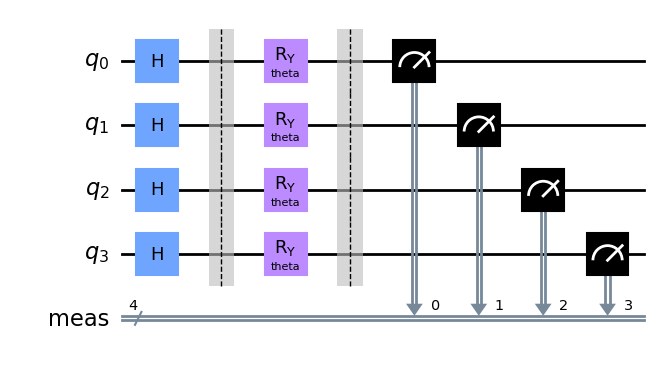

In [21]:
simulator = qiskit.Aer.get_backend('aer_simulator')

circuit = QuantumCircuit(4, simulator, 300)
print('Expected value for rotation pi {}'.format(circuit.run([np.pi])[0]))
circuit._circuit.draw()

In [22]:
# Let's generate some sample fingerprints
fingerprints = np.random.randint(0, 2, size=(1000, 1024))

n_samples = 100

# Leaving only labels 0 and 1
idx = np.append(np.where(fingerprints == 0)[0][:n_samples],
        np.where(fingerprints == 1)[0][:n_samples])

X_train_data = fingerprints[idx]
X_train_targets = fingerprints[idx]

train_loader = torch.utils.data.DataLoader(X_train_data, batch_size=1, shuffle=True)

tensor([[0, 0, 1,  ..., 0, 1, 1]]) tensor([[0, 0, 1,  ..., 0, 1, 1]])
tensor([[0, 0, 1,  ..., 0, 1, 1]]) tensor([[0, 0, 1,  ..., 0, 1, 1]])
tensor([[0, 0, 1,  ..., 0, 1, 1]]) tensor([[0, 0, 1,  ..., 0, 1, 1]])
tensor([[0, 0, 1,  ..., 0, 1, 1]]) tensor([[0, 0, 1,  ..., 0, 1, 1]])
tensor([[0, 0, 1,  ..., 0, 1, 1]]) tensor([[0, 0, 1,  ..., 0, 1, 1]])
tensor([[0, 0, 1,  ..., 0, 1, 1]]) tensor([[0, 0, 1,  ..., 0, 1, 1]])


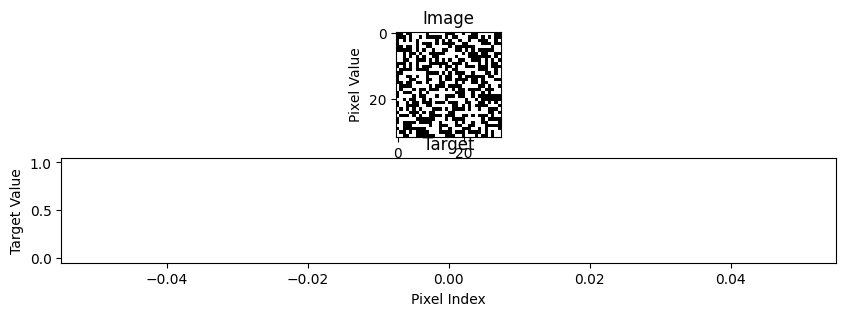

In [23]:
# Generate some sample fingerprints
fingerprints = np.random.randint(0, 2, size=(1000, 1024))

# Only consider labels 0 and 1
idx = np.append(np.where(fingerprints == 0)[0][:n_samples],
    np.where(fingerprints == 1)[0][:n_samples])

# Split data into training and testing sets
X_train_data = fingerprints[idx]
y_train = fingerprints[idx]

# Create PyTorch DataLoader for training data
train_loader = torch.utils.data.DataLoader(X_train_data, batch_size=1, shuffle=True, pin_memory=True, num_workers=8)

# Visualize some of the training data
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=2, figsize=(10, 3))  # Specify the number of rows and figure size explicitly

while n_samples_show > 0:
    images = data_iter.__next__()
    targets = data_iter.__next__()
    print(images, targets)
    n_samples_show -= 1  # Decrement the counter for the number of samples to show

    # Plot the images and targets
    axes[0].imshow(images.reshape(32, 32), cmap="gray")
    axes[1].plot(targets.numpy())

    # Set the titles and labels for the subplots
    axes[0].set_title("Image")
    axes[1].set_title("Target")
    axes[0].set_xlabel("Pixel Index")
    axes[0].set_ylabel("Pixel Value")
    axes[1].set_xlabel("Pixel Index")
    axes[1].set_ylabel("Target Value")

plt.show()

tensor([[0, 1, 0,  ..., 1, 1, 1]]) tensor([[0, 1, 0,  ..., 1, 1, 1]])
tensor([[0, 1, 0,  ..., 1, 1, 1]]) tensor([[0, 1, 0,  ..., 1, 1, 1]])
tensor([[0, 1, 0,  ..., 1, 1, 1]]) tensor([[0, 1, 0,  ..., 1, 1, 1]])
tensor([[0, 1, 0,  ..., 1, 1, 1]]) tensor([[0, 1, 0,  ..., 1, 1, 1]])
tensor([[0, 1, 0,  ..., 1, 1, 1]]) tensor([[0, 1, 0,  ..., 1, 1, 1]])
tensor([[0, 1, 0,  ..., 1, 1, 1]]) tensor([[0, 1, 0,  ..., 1, 1, 1]])


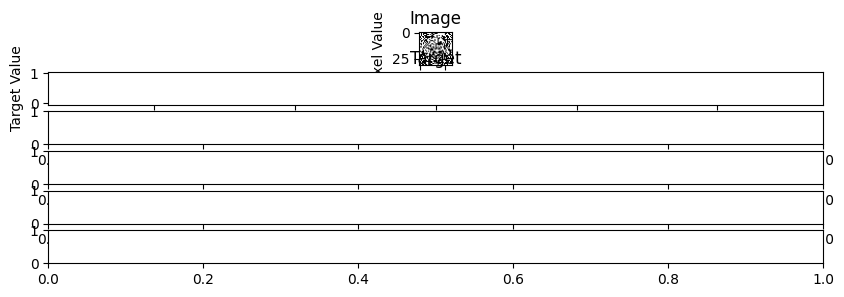

In [24]:
# Code to generate fingerprints
fingerprints = np.random.randint(0, 2, size=(1000, 1024))

# Only consider labels 0 and 1
idx = np.append(np.where(fingerprints == 0)[0][:n_samples],
    np.where(fingerprints == 1)[0][:n_samples])

# Split data into training and testing sets
X_train_data = fingerprints[idx]
y_train = fingerprints[idx]

# Create PyTorch DataLoader for training data
train_loader = torch.utils.data.DataLoader(X_train_data, batch_size=1, shuffle=True, pin_memory=True, num_workers=8)

# Visualize some of the training data
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=n_samples_show, figsize=(10, 3))  # Set the number of rows and figure size explicitly

while n_samples_show > 0:
    images = data_iter.__next__()
    targets = data_iter.__next__()
    print(images, targets)
    n_samples_show -= 1  # Decrement the counter for the number of samples to show

    # Plot the images and targets
    axes[0].imshow(images.reshape(32, 32), cmap="gray")
    axes[1].plot(targets.numpy())

    # Set the titles and labels for the subplots
    axes[0].set_title("Image")
    axes[1].set_title("Target")
    axes[0].set_xlabel("Pixel Index")
    axes[0].set_ylabel("Pixel Value")
    axes[1].set_xlabel("Pixel Index")
    axes[1].set_ylabel("Target Value")

plt.show()

In [29]:
class Hybrid(nn.Module):
    def __init__(self, backend, shots, theta):
        super().__init__()
        self.backend = backend
        self.shots = shots
        self.theta = torch.nn.Parameter(theta)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        circuits = [self.backend.get_circuit_topology().circuit] * x.shape[0]
        return self.backend.run(circuits, self.shots)[0]

# Define the IBMQ provider
provider = IBMQ.load_account()

# Get the simulator backend and shots
backend = provider.get_backend('aer_simulator')
shots = 1000

# Define the theta parameter
theta = torch.nn.Parameter(torch.tensor(0.5))

# Initialize the model
model = Hybrid(backend, shots, theta)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
loss_func = nn.NLLLoss()

# Define the training and testing data loaders
train_loader = ...  # Define the training data loader here
test_loader = ...  # Define the testing data loader here

# Train the model for a number of epochs
epochs = 20
loss_list = []
for epoch in range(epochs):
    total_loss = []
    for batch_idx, data in enumerate(train_loader):
        # Zero the gradients
        model.zero_grad()

        # Forward pass
        output = model(data)

        # Compute the loss
        loss = loss_func(output, data)

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Append the loss to the list
        total_loss.append(loss.item())

    # Compute the average loss for the epoch
    loss_list.append(sum(total_loss) / len(total_loss))

    # Print the progress of the training
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

# Evaluate the trained model on the test data
model.eval()
with torch.no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(test_loader) * 100)
    )

__init__.discover_credentials:INFO:2024-02-04 09:09:59,681: Using credentials from qiskitrc
ibmqfactory.load_account:WARNING:2024-02-04 09:10:04,963: Credentials are already in use. The existing account in the session will be replaced.


Traceback (most recent call last):
  Cell In[29], line 16
    backend = provider.get_backend('aer_simulator')
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/provider.py:55 in get_backend
    raise QiskitBackendNotFoundError("No backend matches the criteria")
QiskitBackendNotFoundError: 'No backend matches the criteria'

Use %tb to get the full traceback.


Traceback (most recent call last):
  Cell In[30], line 5
    model.eval()
NameError: name 'model' is not defined

Use %tb to get the full traceback.


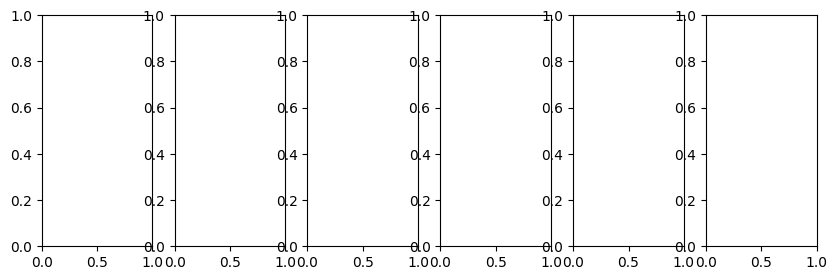

In [30]:
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 

        axes[count].imshow(data[0].numpy().squeeze(), cmap='gray')

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title('Predicted {}'.format(pred.item()))
        
        count += 1